In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'Balangir_HLPCA-21393-2011_H14_census.xlsx',
 'Expenditures.ipynb',
 'expenditures.txt',
 'Ganjam_HLPCA-21388-2011_H14_census.xlsx',
 'HouseholdCensusReport.ipynb',
 'IPFS.pdf',
 'TotalExpenditure.txt']

In [320]:
years = []
expenditures = {}
expenditures_raw = {}
total =[]
yearlength =11
def parse_expenditure(line):
    cols = line.split()
    namelength = len(cols)-yearlength
    name = ' '.join(cols[0:namelength])
    values = np.array([int(c) for c in cols[namelength:]])
    return name,values

with open('TotalExpenditure.txt') as t:
    total = parse_expenditure(t.readlines()[0])
    print(total)

with open('expenditures.txt') as f:
    lines = f.readlines()
    years = [col.strip().split('-')[0] for col in lines[0].split(' ')]
    for line in lines[1:]:
        expenditure = parse_expenditure(line)
        expenditures[expenditure[0]] = expenditure[1]/total[1]*100
        expenditures_raw[expenditure[0]] = expenditure[1]

('TOTAL EXPENDITURE', array([ 156226,  556664, 1523999, 1822561, 2116478, 2381434, 2649263,
       2953311, 3192794, 3974546, 4385797]))


In [308]:
#for key in expenditures.keys():
#    print(key, expenditures[key])
    
expenditures

{'Defence services': array([9.87415667, 8.91417444, 7.49495242, 7.77921836, 7.28176716,
        7.17689426, 6.86137994, 6.89053743, 6.84961197, 5.65186565,
        5.67967464]),
 'Border roads': array([0.04160639, 0.0384433 , 0.05780844, 0.0650184 , 0.11438815,
        0.09263326, 0.08587294, 0.07422178, 0.        , 0.        ,
        0.        ]),
 'Interest payments': array([16.00629857, 22.05854878, 18.21772849, 17.4088549 , 16.59100638,
        16.93244491, 17.27084098, 18.19882837, 18.34487286, 16.48346755,
        16.93630599]),
 'Tax collection charges': array([1.26291398, 1.18024517, 0.97493502, 1.01450651, 0.95465202,
        0.96458688, 0.99986298, 1.01563973, 1.01989042, 0.90807856,
        0.92758511]),
 'Currency, coinage and mint': array([1.65785465e-01, 1.71378066e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.38603012e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 'Subscription to IMF': array([0.35205408,

In [309]:
expdata= pd.DataFrame(expenditures)
expdata["years"] = years
#expdata['total'] = total[1]
expdata=expdata.set_index("years")
expdata


,Defence services,Border roads,Interest payments,Tax collection charges,"Currency, coinage and mint",Subscription to IMF,Police,External affairs,Others,Organs of State,...,Rural development,Industry & minerals less DCUs,Fertiliser subsidy,Major & medium irrigation,Minor irrigation,Power projects,Roads & bridges,Civil aviation,"Ports, light houses & shipping",Public works
years,,,,,,,,,,,,,,,,,,,,,
1990,9.874157,0.041606,16.006299,1.262914,0.165785,0.352054,3.621036,0.284844,2.095682,0.696427,...,3.294586,2.462458,2.816433,2.098242,0.948626,2.605840,2.233303,0.018563,0.121619,0.877575
2000,8.914174,0.038443,22.058549,1.180245,0.171378,0.112995,3.834090,0.248085,2.186957,0.765453,...,2.645941,1.214736,2.481030,2.168454,0.518985,3.042769,3.480376,0.041497,0.154671,0.719824
2008,7.494952,0.057808,18.217728,0.974935,0.000000,0.094751,3.372640,0.214305,1.636156,0.619620,...,4.818770,1.642586,5.026381,2.144621,0.500919,3.393309,4.181236,0.057612,0.088780,0.642454
2009,7.779218,0.065018,17.408855,1.014507,0.000000,0.200487,3.721686,0.181283,1.754180,0.733748,...,4.068890,2.033293,3.361424,1.898757,0.553836,2.753433,4.081564,0.110778,0.072700,0.703680
2010,7.281767,0.114388,16.591006,0.954652,0.000000,0.427644,3.642986,0.164235,1.489786,0.669131,...,3.949911,3.125192,2.943617,1.638099,0.572933,2.438863,4.503803,0.122420,0.075408,0.728238
2011,7.176894,0.092633,16.932445,0.964587,0.000000,0.067732,3.771467,0.161079,1.535167,0.695883,...,3.569908,4.086949,2.972663,1.525467,0.547779,2.912657,4.064652,0.090744,0.056898,0.625505
2012,6.861380,0.085873,17.270841,0.999863,0.000000,0.163177,3.845636,0.156043,1.511628,0.640367,...,3.442203,4.699873,2.476651,1.453763,0.482134,3.312733,3.622366,0.270226,0.050014,0.642707
2013,6.890537,0.074222,18.198828,1.015640,0.000034,0.012427,3.901282,0.150678,1.480542,0.673177,...,3.310352,3.893731,2.401813,1.296206,0.420816,3.283806,4.081081,0.239731,0.055734,0.637014
2014,6.849612,0.000000,18.344873,1.019890,0.000000,0.144670,4.025534,0.155694,1.438427,0.734592,...,3.489358,2.892420,2.226138,1.265287,0.404379,3.876448,3.949112,0.212917,0.055249,0.630858


In [310]:
#df.update(df.iloc[:, 3:7].mul(df.Count, 0))

In [311]:
def findtype(substr):
    print([col for col in expdata.columns if substr in col.lower()])

In [371]:
def plotexp(exptype):
    pp.plot(expdata.index, expdata[exptype])
    pp.title( exptype)

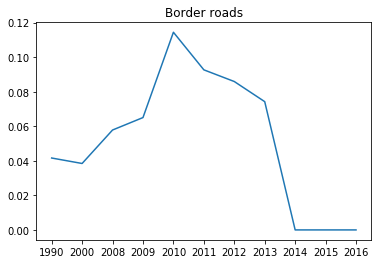

In [372]:
plotexp('Border roads')

In [373]:
findtype('rail')

['Railways']


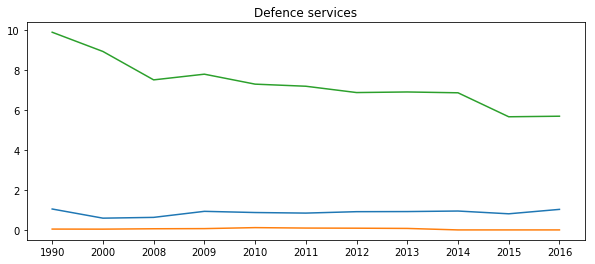

In [374]:
pp.figure(figsize=(10,4))
plotexp('Railways')
plotexp('Border roads')
plotexp('Defence services')

In [375]:
#find top spendings
#find sectors where spending has decreased over the years
#find sectors where spending has increased over the years
def expbarchart(series,title):
    objects = series.index
    y_pos = np.arange(len(objects))
    performance = series.values

    pp.barh(y_pos, performance, align='center', alpha=0.5)
    pp.yticks(y_pos, objects)
    pp.xlabel('expenditure percentage')
    pp.title(title)

In [376]:
#top spendings 2017
exp2016 = expdata.loc['2016'][expdata.loc['2016']>0.4]
top = exp2016.sort_values(ascending=False).head(10).sort_values()
least = exp2016.sort_values(ascending=True).head(10).sort_values(ascending=False)
#expbarchart(top,'Top govt expenditures in 2016-17')

least

Compensation & assignment to local bodies    1.373775
Railways                                     1.026039
Tax collection charges                       0.927585
Organs of State                              0.747344
Housing                                      0.730586
Public works                                 0.676411
Scientific services & research               0.642939
Family welfare                               0.478545
Minor irrigation                             0.439008
Labour & employment                          0.405194
Name: 2016, dtype: float64

In [377]:
exp2016.sort_values(ascending=True).head()

Labour & employment               0.405194
Minor irrigation                  0.439008
Family welfare                    0.478545
Scientific services & research    0.642939
Public works                      0.676411
Name: 2016, dtype: float64

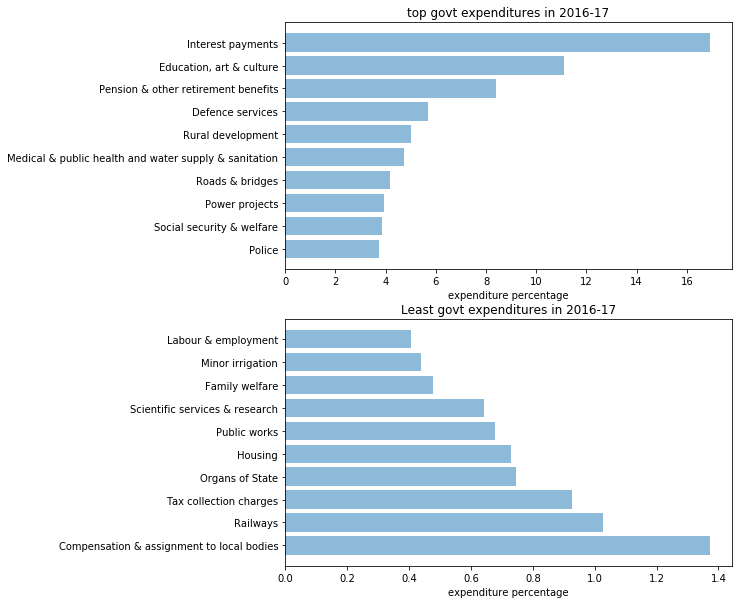

In [378]:
pp.figure(figsize=(8,10))
pp.subplot(2,1,1)
expbarchart(top,'top govt expenditures in 2016-17')
pp.subplot(2,1,2)
expbarchart(least,'Least govt expenditures in 2016-17')

In [379]:
findtype('edu')

['Education, art & culture']


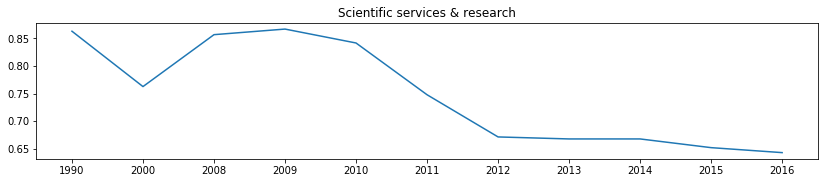

In [380]:
pp.figure(figsize=(14,2.5))
plotexp('Scientific services & research')

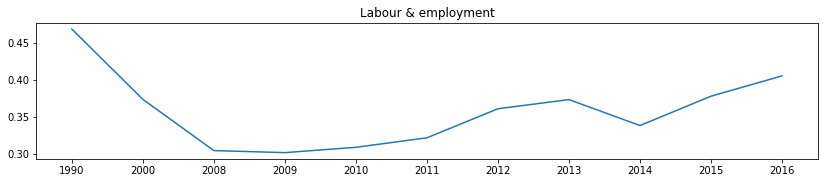

In [381]:
pp.figure(figsize=(14,2.5))
plotexp('Labour & employment')

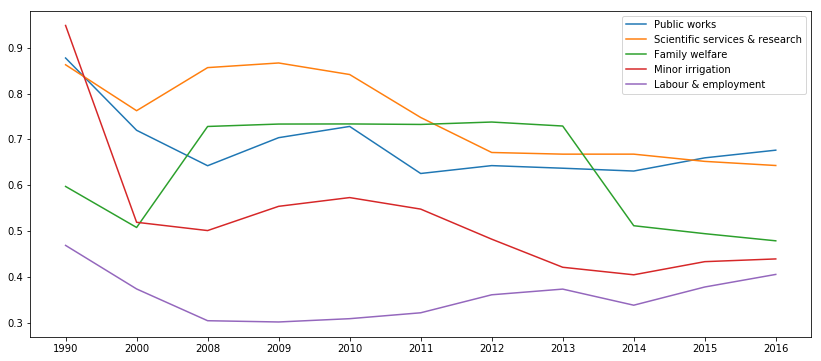

In [383]:
pp.figure(figsize=(14,6))
for i in least.tail(5).index:
    plotexp(i)
pp.title("")
pp.legend(least.tail(5).index)

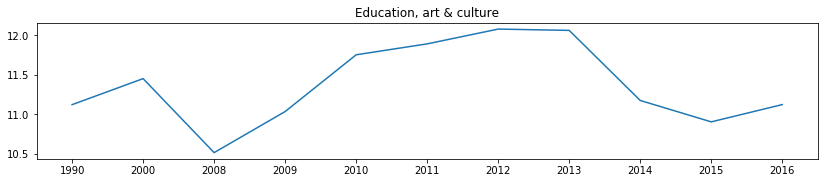

In [384]:
pp.figure(figsize=(14,2.5))
plotexp('Education, art & culture')